not converged yet!
[-0.8 -0.1]
not converged yet!
[-0.5  0.7]
converged!


Text(0, 0.5, 'x2')

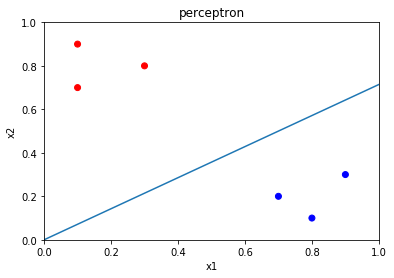

In [23]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
training_inputs = np.asanyarray([[0.8, 0.1],[0.7, 0.2],[0.9, 0.3],[0.3, 0.8],[0.1, 0.7],[0.1, 0.9]])
d = np.shape(training_inputs)[1]
labels = np.array([-1,-1,-1, 1, 1, 1])
colors = {'red', 'blue'}

w = np.zeros(d)
while(any([element <= 0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs)] ])):    
     print("not converged yet!")
     mistakes = np.where([element<=0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs)] ])[0]
     misclass = np.min(mistakes)
     w = w + labels[misclass]*training_inputs[misclass]         
     print(w)
print("converged!")
#plot the seperator
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (0) / w[1] 
plt.plot(xx,yy)
plt.scatter(training_inputs[:,0],training_inputs[:,1],c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("perceptron")
plt.xlabel("x1")
plt.ylabel("x2")

not converged yet!
[-0.8 -0.1 -1. ]
number of true positives:  0
not converged yet!
[-0.5  0.7  0. ]
number of true positives:  3
not converged yet!
[-0.9  0.3 -1. ]
number of true positives:  0
not converged yet!
[-0.6  1.1  0. ]
number of true positives:  3
not converged yet!
[-1.   0.7 -1. ]
number of true positives:  0
not converged yet!
[-0.7  1.5  0. ]
number of true positives:  3
not converged yet!
[-1.1  1.1 -1. ]
number of true positives:  0
not converged yet!
[-0.8  1.9  0. ]
number of true positives:  3
not converged yet!
[-1.2  1.5 -1. ]
number of true positives:  1
not converged yet!
[-0.9  2.3  0. ]
number of true positives:  3
not converged yet!
[-1.3  1.9 -1. ]
number of true positives:  3
converged!


Text(0, 0.5, 'x2')

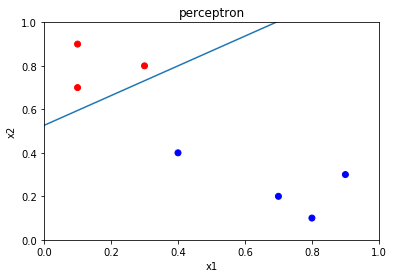

In [24]:
training_inputs =  np.vstack((training_inputs, [0.4,0.4]))
labels = np.append(labels, -1)
training_inputs_ext = np.hstack((training_inputs,np.ones((np.shape(training_inputs)[0],1))))
d = np.shape(training_inputs_ext)[1]
w = np.zeros(d)
while(any([element<=0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs_ext)] ])):    
     print("not converged yet!")
     mistakes = np.where([element<=0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs_ext)] ])[0]
     misclass = np.min(mistakes)
     w = w + labels[misclass]*training_inputs_ext[misclass]
     print(w)
     pred_labels = [1 if x>0 else -1 for x in [np.dot(w,x) for x in training_inputs_ext]]
     tp = np.sum(np.logical_and(np.asarray(pred_labels) == 1, np.asarray(labels) == 1))
     print("number of true positives: ",tp)

print("converged!")
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (w[2]) / w[1] 
plt.plot(xx,yy)
plt.scatter(training_inputs_ext[:,0],training_inputs_ext[:,1],c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("perceptron")
plt.xlabel("x1")
plt.ylabel("x2")

In [6]:
import numpy as np

X=np.array([[0.8, 0.1], [0.7, 0.2], [0.9, 0.3], [0.3, 0.8], [0.1, 0.7], [0.1, 0.9],[0.4,0.4]])
y=np.array([-1,-1,-1,+1,+1,+1,-1])
m,n=X.shape
w=np.zeros(n)
eta=0.01
niter=1000

def cost_func(X,y,w):
    cost = 0
    for j in range(m):
        cost+=np.log(1+np.exp(-y[j]*np.dot(w,X[j])))
    return (1.0/m)*cost
for t in range(niter):
  ## to compute the sum of component wise gradient, slide 23
  JD=0
  for i in range(m):
    #print(i)
    JD+=-(1/(1+np.exp(+y[i]*np.dot(w,X[i])))*y[i]*X[i])
    #print ("JD",JD)
  norm_JD = JD/float(m)
  w=w-eta*norm_JD
#print("w",w,np.linalg.norm(w))

for th in (0.5,0.3,0.8):
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=1/(1+np.exp(-np.dot(w,X[i])))
    yp=np.sign(1*(ypred>=th))
    tp = np.sum(np.logical_and(np.asarray(yp) == 1, np.asarray(y) == 1))
    print("number of true positives:" , tp)


number of true positives: 3
number of true positives: 3
number of true positives: 0
